# Final project

1. [The setup](#The-setup)
2. [The raw data](#The-raw-data)
3. [The processed data](#The-processed-data)
4. [The data](#The-data)
5. [The visualized data](#The-visualized-data)
6. [Preparing the data](#Preparing-the-data)
7. [Training the network](#Training-the-network)
8. [Checking out predictions](#Checking-out-predictions)
9. [The simulation](#The-simulation)

## The setup

Import the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The raw data

The first step when working with neural networks is to load the data which we'll work with.

We load information related to each team by year.

In [2]:
teams = pd.read_csv('Teams.csv',index_col=0).reset_index()
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
len(teams)

2925

And we load information related to team salaries by player and by year.

In [4]:
salaries = pd.read_csv('Salaries.csv',index_col=0).reset_index()
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [5]:
len(salaries)

26428

## The processed data

### Match yearly information

Remove the yearly information from teams based on the yearly information we have on salaries.

In [6]:
first_year = salaries['yearID'][0]
first_year

1985

In [7]:
last_year = salaries['yearID'][len(salaries) - 1]
last_year

2016

In [8]:
teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2019,NL,SLN,STL,C,1,162,81.0,91,71,...,168,0.989,St. Louis Cardinals,Busch Stadium III,3480393.0,98,97,STL,SLN,SLN
2921,2019,AL,TBA,TBD,E,2,162,81.0,96,66,...,126,0.985,Tampa Bay Rays,Tropicana Field,1178735.0,97,96,TBR,TBA,TBA
2922,2019,AL,TEX,TEX,W,3,162,81.0,78,84,...,143,0.982,Texas Rangers,Globe Life Park in Arlington,2132994.0,111,112,TEX,TEX,TEX
2923,2019,AL,TOR,TOR,E,4,162,81.0,67,95,...,141,0.984,Toronto Blue Jays,Rogers Centre,1750114.0,97,98,TOR,TOR,TOR


In [9]:
teams_processed = teams[teams['yearID'] >= first_year]
teams_processed = teams_processed[teams['yearID'] <= last_year]
teams_processed

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1917,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,197,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1918,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,168,0.979,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL
1919,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,161,0.977,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS
1920,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,202,0.982,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL
1921,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,152,0.982,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,2016,NL,SLN,STL,C,2,162,81.0,86,76,...,169,0.983,St. Louis Cardinals,Busch Stadium III,3444490.0,100,99,STL,SLN,SLN
2831,2016,AL,TBA,TBD,E,5,162,81.0,68,94,...,129,0.984,Tampa Bay Rays,Tropicana Field,1286163.0,93,94,TBR,TBA,TBA
2832,2016,AL,TEX,TEX,W,1,162,81.0,95,67,...,190,0.984,Texas Rangers,Rangers Ballpark in Arlington,2710402.0,106,105,TEX,TEX,TEX
2833,2016,AL,TOR,TOR,E,2,162,81.0,89,73,...,144,0.986,Toronto Blue Jays,Rogers Centre,3392099.0,111,110,TOR,TOR,TOR


In [10]:
len(teams_processed)

918

### Salaries information

Get all salaries by team and by year.

In [11]:
salaries_processed = salaries.groupby(['yearID', 'teamID'])
salaries_processed.sum()

salary
yearID teamID           
1985   ATL      14807000
       BAL      11560712
       BOS      10897560
       CAL      14427894
       CHA       9846178
...                  ...
2016   SLN     143053500
       TBA      57097310
       TEX     176038723
       TOR     138701700
       WAS     141652646

[918 rows x 1 columns]

In [12]:
len(salaries_processed)

918

### Combine salaries information into teams information 

First, let's remove information we won't use:

In [13]:
teams_processed.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
1917,1985,NL,ATL,ATL,W,5,162,81.0,66,96,...,197,0.976,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1918,1985,AL,BAL,BAL,E,4,161,81.0,83,78,...,168,0.979,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL
1919,1985,AL,BOS,BOS,E,5,163,81.0,81,81,...,161,0.977,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS
1920,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,202,0.982,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL
1921,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,152,0.982,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA


In [14]:
fields_to_drop = ['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro']

In [15]:
teams_processed = teams_processed.drop(fields_to_drop, axis=1)
teams_processed.head()

,G,Ghome,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS
1917,162,81.0,66,632,5526,1359,213,28,126,553.0,849.0,72.0,52.0
1918,161,81.0,83,818,5517,1451,234,22,214,604.0,908.0,69.0,43.0
1919,163,81.0,81,800,5720,1615,292,31,162,562.0,816.0,66.0,27.0
1920,162,79.0,90,732,5442,1364,215,31,153,648.0,902.0,106.0,51.0
1921,163,81.0,85,736,5470,1386,247,37,146,471.0,843.0,108.0,56.0


Add salary column to teams information:

In [16]:
salaries_processed.sum()

salary
yearID teamID           
1985   ATL      14807000
       BAL      11560712
       BOS      10897560
       CAL      14427894
       CHA       9846178
...                  ...
2016   SLN     143053500
       TBA      57097310
       TEX     176038723
       TOR     138701700
       WAS     141652646

[918 rows x 1 columns]

In [17]:
salaries_to_include = []

for salary in salaries_processed.sum()['salary']:
    salaries_to_include.append(salary)

In [18]:
len(salaries_to_include)

918

In [19]:
teams_processed['salaries'] = salaries_to_include

## The data

In [20]:
teams_processed

,G,Ghome,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS,salaries
1917,162,81.0,66,632,5526,1359,213,28,126,553.0,849.0,72.0,52.0,14807000
1918,161,81.0,83,818,5517,1451,234,22,214,604.0,908.0,69.0,43.0,11560712
1919,163,81.0,81,800,5720,1615,292,31,162,562.0,816.0,66.0,27.0,10897560
1920,162,79.0,90,732,5442,1364,215,31,153,648.0,902.0,106.0,51.0,14427894
1921,163,81.0,85,736,5470,1386,247,37,146,471.0,843.0,108.0,56.0,9846178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,162,81.0,86,779,5548,1415,299,32,225,526.0,1318.0,35.0,26.0,143053500
2831,162,81.0,68,672,5481,1333,288,32,216,449.0,1482.0,60.0,37.0,57097310
2832,162,81.0,95,765,5525,1446,257,23,215,436.0,1220.0,99.0,36.0,176038723
2833,162,81.0,89,759,5479,1358,276,18,221,632.0,1362.0,54.0,24.0,138701700


## Preparing the data

To use our data in a format that gives the best results, we'll add some processing.

### Scaling target variables

To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors will be saved, so we can go backwards when we use the network for predictions.

In [21]:
quant_features = ['G', 'Ghome', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'salaries']

# Store scalings in a dictionary so we can convert back later
scaled_features = {}

for quant in quant_features:
    mean, std = teams_processed[quant].mean(), teams_processed[quant].std()
    scaled_features[quant] = [mean, std]
    teams_processed.loc[:, quant] = (teams_processed[quant] - mean) / std

teams_processed.head()

,G,Ghome,W,R,AB,H,2B,3B,HR,BB,SO,SB,CS,salaries
1917,0.238315,0.236283,-1.177626,-1.090497,0.188587,-0.671964,-1.823706,-0.327234,-0.862271,0.363576,-1.226301,-0.877215,0.460311,-1.044463
1918,0.123050,0.236283,0.258158,0.979429,0.158616,0.196764,-1.208884,-0.987940,1.504623,1.050608,-0.857231,-0.958779,-0.123702,-1.119418
1919,0.353580,0.236283,0.089242,0.779113,0.834616,1.745365,0.489198,0.003119,0.106004,0.484817,-1.432730,-1.040344,-1.161946,-1.134730
1920,0.238315,-0.214200,0.849363,0.022366,-0.091137,-0.624750,-1.765152,0.003119,-0.136065,1.643342,-0.894764,0.047179,0.395421,-1.053217
1921,0.353580,0.236283,0.427073,0.066881,0.002104,-0.417011,-0.828279,0.663825,-0.324340,-0.741064,-1.263834,0.101555,0.719872,-1.159006


In [22]:
scaled_features

{'G': [159.93246187363835, 8.675653937883181],
 'Ghome': [79.95098039215686, 4.439683508919887],
 'W': [79.94335511982571, 11.840223777056089],
 'R': [729.9901960784314, 89.85830911056667],
 'AB': [5469.3681917211325, 300.2957966515429],
 'H': [1430.1623093681917, 105.90199794585986],
 '2B': [275.2908496732026, 34.1561834388321],
 '3B': [30.971677559912855, 9.081195810971472],
 'HR': [158.05882352941177, 37.179525907493904],
 'BB': [526.0108932461874, 74.2323409860844],
 'SO': [1045.0381263616557, 159.86134145023848],
 'SB': [104.26470588235294, 36.78083097526128],
 'CS': [44.90631808278867, 15.410626117514742],
 'salaries': [60042632.63180828, 43309923.775295034]}

### Splitting the data into training, and validation sets

We train our models in the training.

We'll save the data for the last approximately 2 years to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of wins.

In [23]:
# Save data for approximately the last 2 years
test_data = teams_processed[-60:]

# Now remove the test data from the data set 
teams_processed = teams_processed[:-60]

# Separate the data into features (X) and targets (y)
target_fields = ['W']

features, targets = teams_processed.drop(target_fields, axis=1), teams_processed[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [24]:
len(test_data)

60

In [25]:
len(teams_processed)

858

In [26]:
features.head()

,G,Ghome,R,AB,H,2B,3B,HR,BB,SO,SB,CS,salaries
1917,0.238315,0.236283,-1.090497,0.188587,-0.671964,-1.823706,-0.327234,-0.862271,0.363576,-1.226301,-0.877215,0.460311,-1.044463
1918,0.123050,0.236283,0.979429,0.158616,0.196764,-1.208884,-0.987940,1.504623,1.050608,-0.857231,-0.958779,-0.123702,-1.119418
1919,0.353580,0.236283,0.779113,0.834616,1.745365,0.489198,0.003119,0.106004,0.484817,-1.432730,-1.040344,-1.161946,-1.134730
1920,0.238315,-0.214200,0.022366,-0.091137,-0.624750,-1.765152,0.003119,-0.136065,1.643342,-0.894764,0.047179,0.395421,-1.053217
1921,0.353580,0.236283,0.066881,0.002104,-0.417011,-0.828279,0.663825,-0.324340,-0.741064,-1.263834,0.101555,0.719872,-1.159006


In [27]:
targets.head()

,W
1917,-1.177626
1918,0.258158
1919,0.089242
1920,0.849363
1921,0.427073


## Training the network

First, we have to set the hyperparameters for the network. The goal here is to find hyperparameters such that the error on the training set is low, but we're not overfitting to the data.

We'll use a simple sequential neural network with a single layer.

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Dense
from keras.optimizers import SGD

Using TensorFlow backend.
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tenso

We can then use Keras to create a simple linear model (called Dense() in Keras) and optimize it using SGD to minimize our mean squared error (mse):

In [30]:
model = Sequential([Dense(1, input_shape=(13,))])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.get_weights()

[array([[-0.4656824 ],
        [-0.15004158],
        [ 0.48706257],
        [ 0.26382565],
        [ 0.4610262 ],
        [ 0.48155236],
        [ 0.5997598 ],
        [-0.00795376],
        [ 0.30415106],
        [ 0.42336   ],
        [-0.08929336],
        [ 0.5438218 ],
        [ 0.41222227]], dtype=float32),
 array([0.], dtype=float32)]

In [32]:
model.compile(optimizer='sgd', loss='mse')

The linear model created has set internal weights, which we can use to evaluate the loss function (MSE):

In [33]:
model.evaluate(features, targets, verbose=0)

2.1573595028101424

And proceed to train our network:

In [34]:
model.fit(features, targets, batch_size=1, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
858/858 [==============================] - 1s 1ms/step - loss: 0.8796
Epoch 2/30
858/858 [==============================] - 1s 745us/step - loss: 0.6762
Epoch 3/30
858/858 [==============================] - 1s 703us/step - loss: 0.8598
Epoch 4/30
858/858 [==============================] - 1s 826us/step - loss: 0.8788
Epoch 5/30
858/858 [==============================] - 1s 861us/step - loss: 0.6834
Epoch 6/30
858/858 [==============================] - 1s 705us/step - loss: 0.8489
Epoch 7/30
858/858 [==============================] - 1s 699us/step - loss: 0.6713
Epoch 8/30
858/858 [==============================] - 1s 702us/step - loss: 0.7105
Epoch 9/30
858/858 [==============================] - 1s 699us/step - loss: 0.6331
Epoch 10/30
858/858 [==============================] - 1s 722us/step - loss: 0.6994
Epoch 11/30
858/858 [==============================] - 1s 744us/step - loss: 0.6807
Epoch 12/30
858/858 [==================

Once trained, we evaluate our network using the train data:

In [35]:
model.evaluate(test_features, test_targets, verbose=0)

0.6356492757797241

## Checking out predictions 

Finally, we'll use the test data to view how well our network is modeling the data:

In [36]:
test_features.head()

,G,Ghome,R,AB,H,2B,3B,HR,BB,SO,SB,CS,salaries
2775,0.238315,0.236283,-0.111177,0.598183,0.602800,0.401367,1.875119,-0.109168,-0.485111,1.669959,0.754069,-0.058811,0.041362
2776,0.238315,0.236283,-1.747086,-0.164399,-0.653078,-0.711170,-1.428411,-1.561581,-0.741064,0.387598,-0.958779,-0.772604,0.271038
2777,0.238315,-0.439441,-0.189078,0.052055,-0.568094,-0.857556,-1.208175,1.585313,-1.455038,1.788812,-1.638481,-1.291727,1.269968
2778,0.238315,0.236283,0.200424,0.568212,0.612242,0.547753,0.223354,0.079107,-0.646765,0.644070,-0.904403,-1.161946,2.795220
2779,0.238315,0.236283,-1.201783,0.211897,-0.464225,-0.447674,-0.437352,-0.593306,-1.643635,1.163270,-0.985968,-0.188592,1.208293


In [37]:
# Check out predictions on test data
mean, std = scaled_features['W']
predictions = model.predict(test_features).T * std + mean
predictions

array([[76.81059 , 78.27789 , 81.68043 , 80.05714 , 75.24506 , 84.222664,
        81.14087 , 80.07085 , 78.54822 , 73.70046 , 86.4748  , 78.83614 ,
        83.26381 , 88.03599 , 78.60732 , 79.5116  , 80.36472 , 87.73865 ,
        78.4822  , 75.56725 , 76.01095 , 76.15563 , 81.3785  , 77.87783 ,
        79.94069 , 77.604385, 78.11853 , 86.87618 , 94.66357 , 88.2431  ,
        79.04567 , 75.03944 , 84.19672 , 86.60798 , 78.24379 , 89.69933 ,
        85.62276 , 87.308365, 80.75268 , 84.52118 , 82.486   , 81.365425,
        86.764824, 85.7309  , 73.49095 , 95.66777 , 78.644646, 88.48724 ,
        83.82551 , 77.80533 , 79.55792 , 84.289635, 88.20928 , 84.692825,
        80.79413 , 81.826584, 76.41761 , 89.063354, 88.6644  , 90.9226  ]],
      dtype=float32)

In [38]:
predictions = predictions.round(0)
predictions

array([[77., 78., 82., 80., 75., 84., 81., 80., 79., 74., 86., 79., 83.,
        88., 79., 80., 80., 88., 78., 76., 76., 76., 81., 78., 80., 78.,
        78., 87., 95., 88., 79., 75., 84., 87., 78., 90., 86., 87., 81.,
        85., 82., 81., 87., 86., 73., 96., 79., 88., 84., 78., 80., 84.,
        88., 85., 81., 82., 76., 89., 89., 91.]], dtype=float32)

Check the real target data:

In [39]:
np.array(test_targets['W'] * std + mean)

array([ 79.,  67.,  81.,  78.,  76.,  97.,  64.,  81.,  68.,  74.,  86.,
        95.,  85.,  92.,  71.,  68.,  83.,  87.,  90.,  68.,  63.,  98.,
        74.,  76.,  84., 100.,  80.,  88.,  93.,  83.,  69.,  68.,  89.,
        93.,  78., 103.,  68.,  94.,  75.,  86.,  84.,  81.,  74.,  91.,
        79.,  73.,  59.,  84.,  87.,  69.,  71.,  78.,  68.,  86.,  87.,
        86.,  68.,  95.,  89.,  95.])

Create a plot to compare our predictions against our target data: 

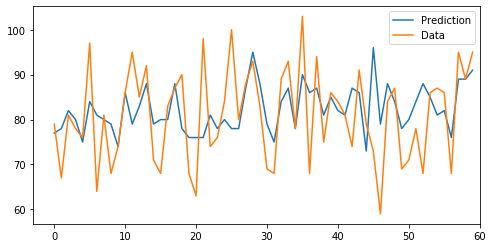

In [40]:
# Configure plot
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['W'] * std + mean).values, label='Data')
ax.set_xlim(right=len(predictions[0]))
ax.legend()

## The simulation

The entry data for the simulated team:

In [41]:
team_simulated = [[162, 81, 873, 5512, 1460, 298, 27, 231, 584, 1308, 116, 29, 15223446]]
team_simulated = pd.DataFrame(team_simulated, index=['0'], columns=['G', 'Ghome', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'salaries'])
team_simulated

,G,Ghome,R,AB,H,2B,3B,HR,BB,SO,SB,CS,salaries
0,162,81,873,5512,1460,298,27,231,584,1308,116,29,15223446


The input data once scaled to be used as input to the neural network:

In [42]:
for scale in scaled_features:
    if scale != 'W':
        mean, std = scaled_features[scale]
        team_simulated.loc[:, scale] = (team_simulated[scale] - mean) / std

team_simulated

,G,Ghome,R,AB,H,2B,3B,HR,BB,SO,SB,CS,salaries
0,0.238315,0.236283,1.591503,0.141966,0.281748,0.664862,-0.437352,1.961864,0.781184,1.644937,0.31906,-1.032166,-1.034848


The prediction based on our simuleated team:

In [43]:
mean, std = scaled_features['W']
team_simulated_prediction = model.predict(team_simulated).T * std + mean
team_simulated_prediction

array([[91.92687]], dtype=float32)

The number of Wins the neural predicts for the simulated team is:

In [44]:
team_simulated_prediction.round(0)[0][0]

92.0